In [2]:
import pandas as pd
import gensim
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.decomposition import LatentDirichletAllocation

data = pd.read_csv('../resources/sciencedirect_carbon_emissions.csv')

In [3]:
# Prepare text data
texts = [doc.split() for doc in data['Processed_Abstracts']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

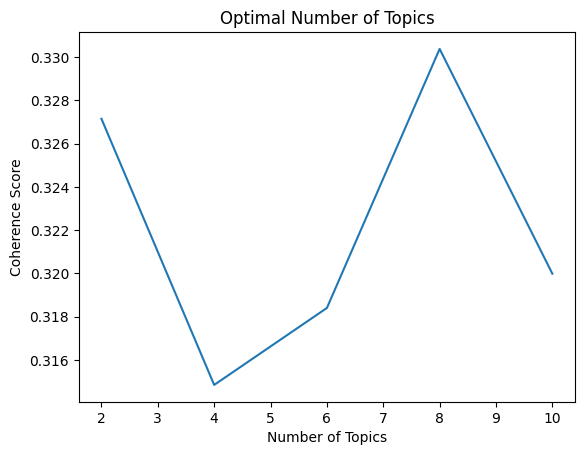

8

In [4]:
import matplotlib.pyplot as plt

# Function to compute coherence for different topic numbers
def compute_coherence_values(dictionary, corpus, texts, start, stop, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=5)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Define range for topics
start, stop, step = 2, 12, 2  # Adjust range for quicker runtime

# Compute coherence scores
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, start, stop, step)

# Plot coherence values
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Find the optimal number of topics
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
optimal_num_topics


In [5]:
# optimal_num_topics = 5

# Fit the optimal LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=10)

# Get top words for each topic
top_words_per_topic = []
for topic_id in range(optimal_num_topics):
    top_words = lda_model.show_topic(topic_id, topn=10)  # Get top 10 words
    top_words_per_topic.append([word for word, _ in top_words])


In [6]:
# Automated topic naming (manual editing may still be required)
topic_names = []
for words in top_words_per_topic:
    topic_names.append(" / ".join(words[:3]))  # Combine the top 3 words as a preliminary name

print(topic_names)


['energy / study / carbon', 'model / change / climate', 'climate / rainfall / change', 'calcium / methanol / co2', 'carbon / co2 / change', 'co2 / climate / energy', 'change / climate / study', 'energy / climate / co2']
